In [17]:
import os, csv, itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from venn import *

In [121]:
DIRECTORY = os.path.join('E:/','Orbi Optimization','20220816 - 313-138 EThcD Orbitrap') 
folders = [x[0] for x in os.walk(DIRECTORY)]

In [122]:
dataframes = []
for folder in folders:
    if "peptides.csv" in os.listdir(folder):
        print(folder)
        name = os.path.basename(folder)
        with open(os.path.join(folder,'peptides.csv'), 'r') as file:
            csv_file = pd.read_csv(file)
            csv_file['Name'] = name
            dataframes.append(csv_file.loc[csv_file['Uniqueness'] == 'UNIQUE'])
            
df_concat = pd.concat(dataframes)

E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA10_OT_1 results 2022-08-18 12-02
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA10_OT_2 results 2022-08-18 12-03
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA15_OT_1 results 2022-08-18 12-04
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA15_OT_2 results 2022-08-18 12-06
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA20_OT_1 results 2022-08-18 12-07
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA20_OT_2 results 2022-08-18 12-08
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA25_OT_1 results 2022-08-18 12-10
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA25_OT_2 results 2022-08-18 12-11
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA30_OT_1 results 2022-08-18 12-13
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA30_OT_2 results 2022-08-18 12-14
E:/Orbi Optimization\20220816 - 313-138 EThcD Orbitrap\SA35_OT_1 results 2022-08-18 12-16
E:/Orbi Op

In [123]:
names = df_concat['Name'].unique()
data_formatted = {name:set(np.array(df_concat.query('Name == @name')['Peptide'])) for name in names}
keys = list(data_formatted.keys()) # get keys in subscriptable form

In [130]:
len(data_formatted[keys[0]]), keys[0]

(430, 'SA10_OT_1 results 2022-08-18 12-02')

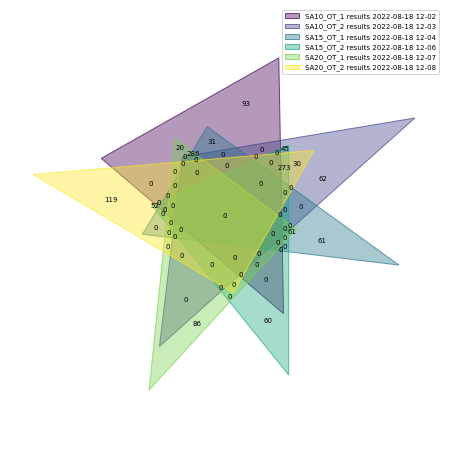

In [135]:
subset = dict(itertools.islice(data_formatted.items(),6))
venn(subset, fontsize=7)
plt.rcParams['figure.figsize'] = [20,20]
plt.show()

In [149]:
n_aliquots = 2

subkeys_aliq1 = [key for key in keys if '_1' in key]
best1 = ['SA20_OT_1','SA25_OT_1','SA30_OT_1','SA35_OT_1']
aliq1_best = [key for key in keys if any(skey in key for skey in best1)]
subkeys_aliq2 = [key for key in keys if '_2' in key]
best2 = ['SA20_OT_2','SA25_OT_2','SA30_OT_2','SA35_OT_2']
aliq2_best = [key for key in keys if any(skey in key for skey in best2)]
# subkeys_aliq3 = [key for key in keys if '3-' in key]
# best3 = ['CID+HCD_60K_120mz_3-1','CID+HCD_60K_120mz_3-2','HCD+EThcD_60K_120mz_3-1','HCD+EThcD_60K_120mz_3-2']
# aliq3_best = [key for key in keys if any(skey in key for skey in best3)]

subkeys = [subkeys_aliq1,subkeys_aliq2]
bests = [aliq1_best,aliq2_best,aliq3_best]

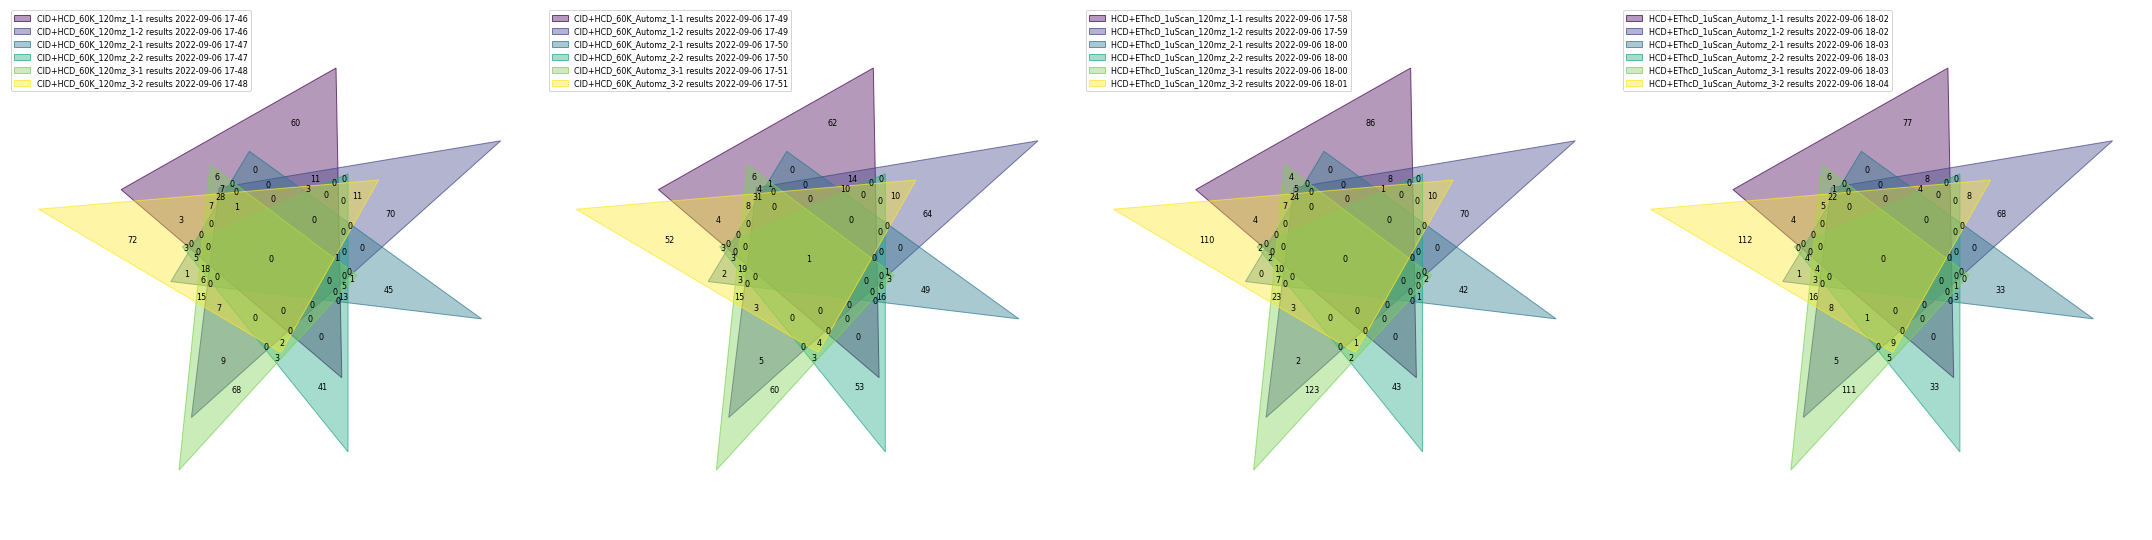

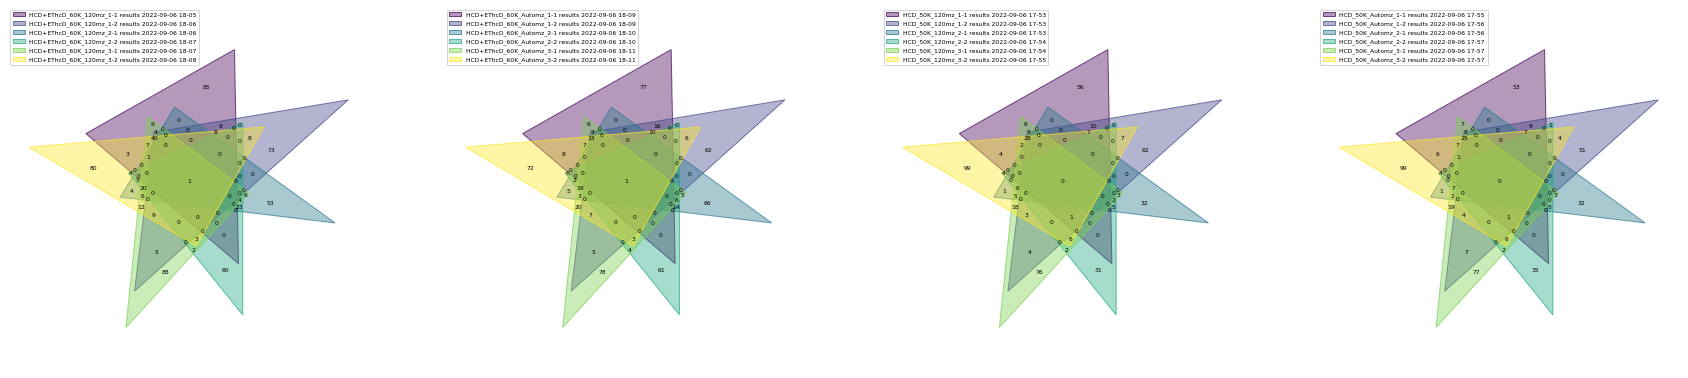

In [84]:
# These are organized by method, not by aliquot - there shouldn't be much overlap


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(30, 30))
for i,ax in enumerate(axs.ravel()):
    sub_keys = keys[i*6:(i+1)*6]
    subset = {sub_key:data_formatted[sub_key] for sub_key in sub_keys}
    venn(subset, fontsize = 8, legend_loc = 'upper left', ax = ax)
plt.tight_layout()

# plt.savefig('Venn Diagram 1.png',dpi=300)

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(30, 30))
for i,ax in enumerate(axs.ravel()):
    sub_keys = keys[(i+4)*6:(i+5)*6]
    subset = {sub_key:data_formatted[sub_key] for sub_key in sub_keys}
    venn(subset, fontsize = 6, legend_loc = 'upper left', ax = ax)
    
# plt.savefig('Venn Diagram 2.png',dpi=300)

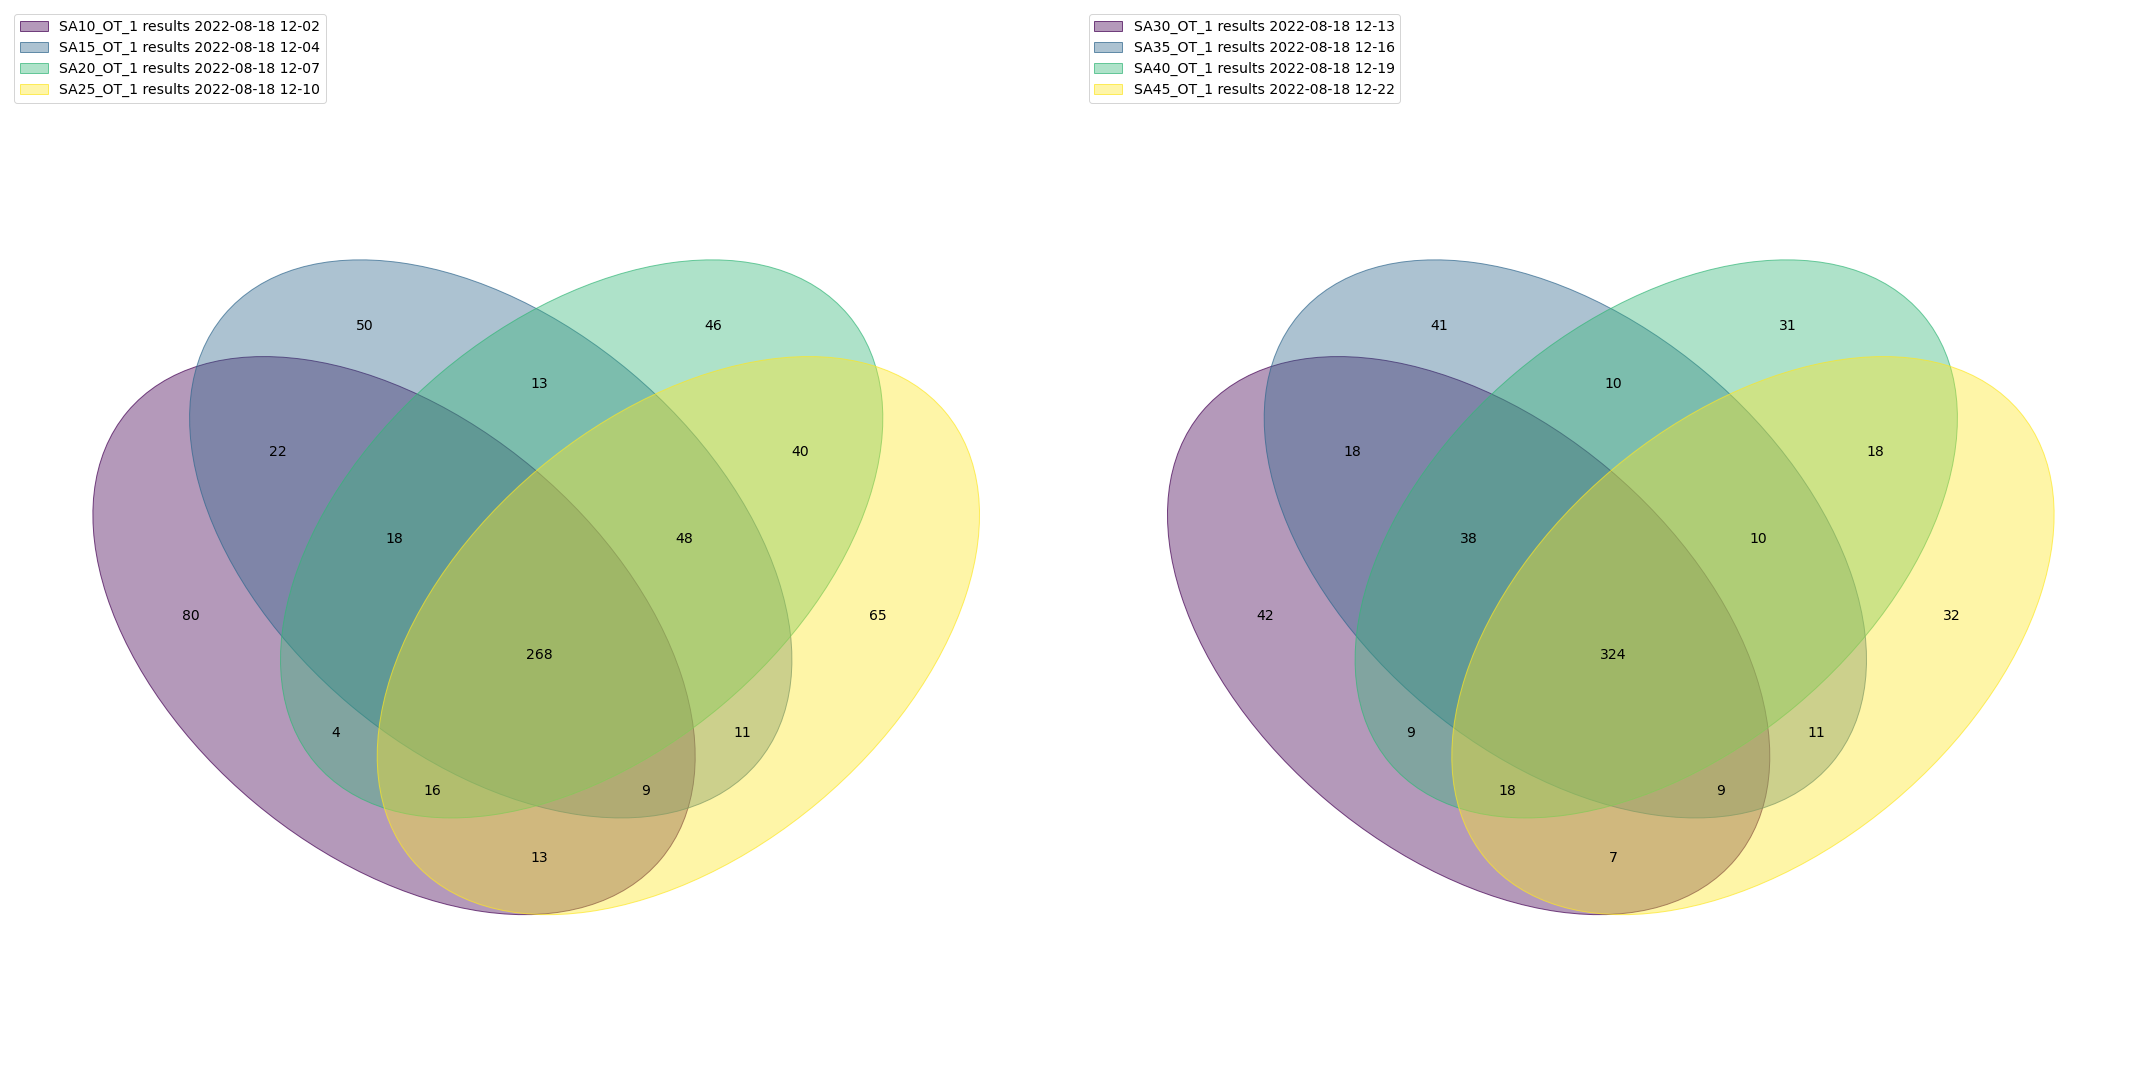

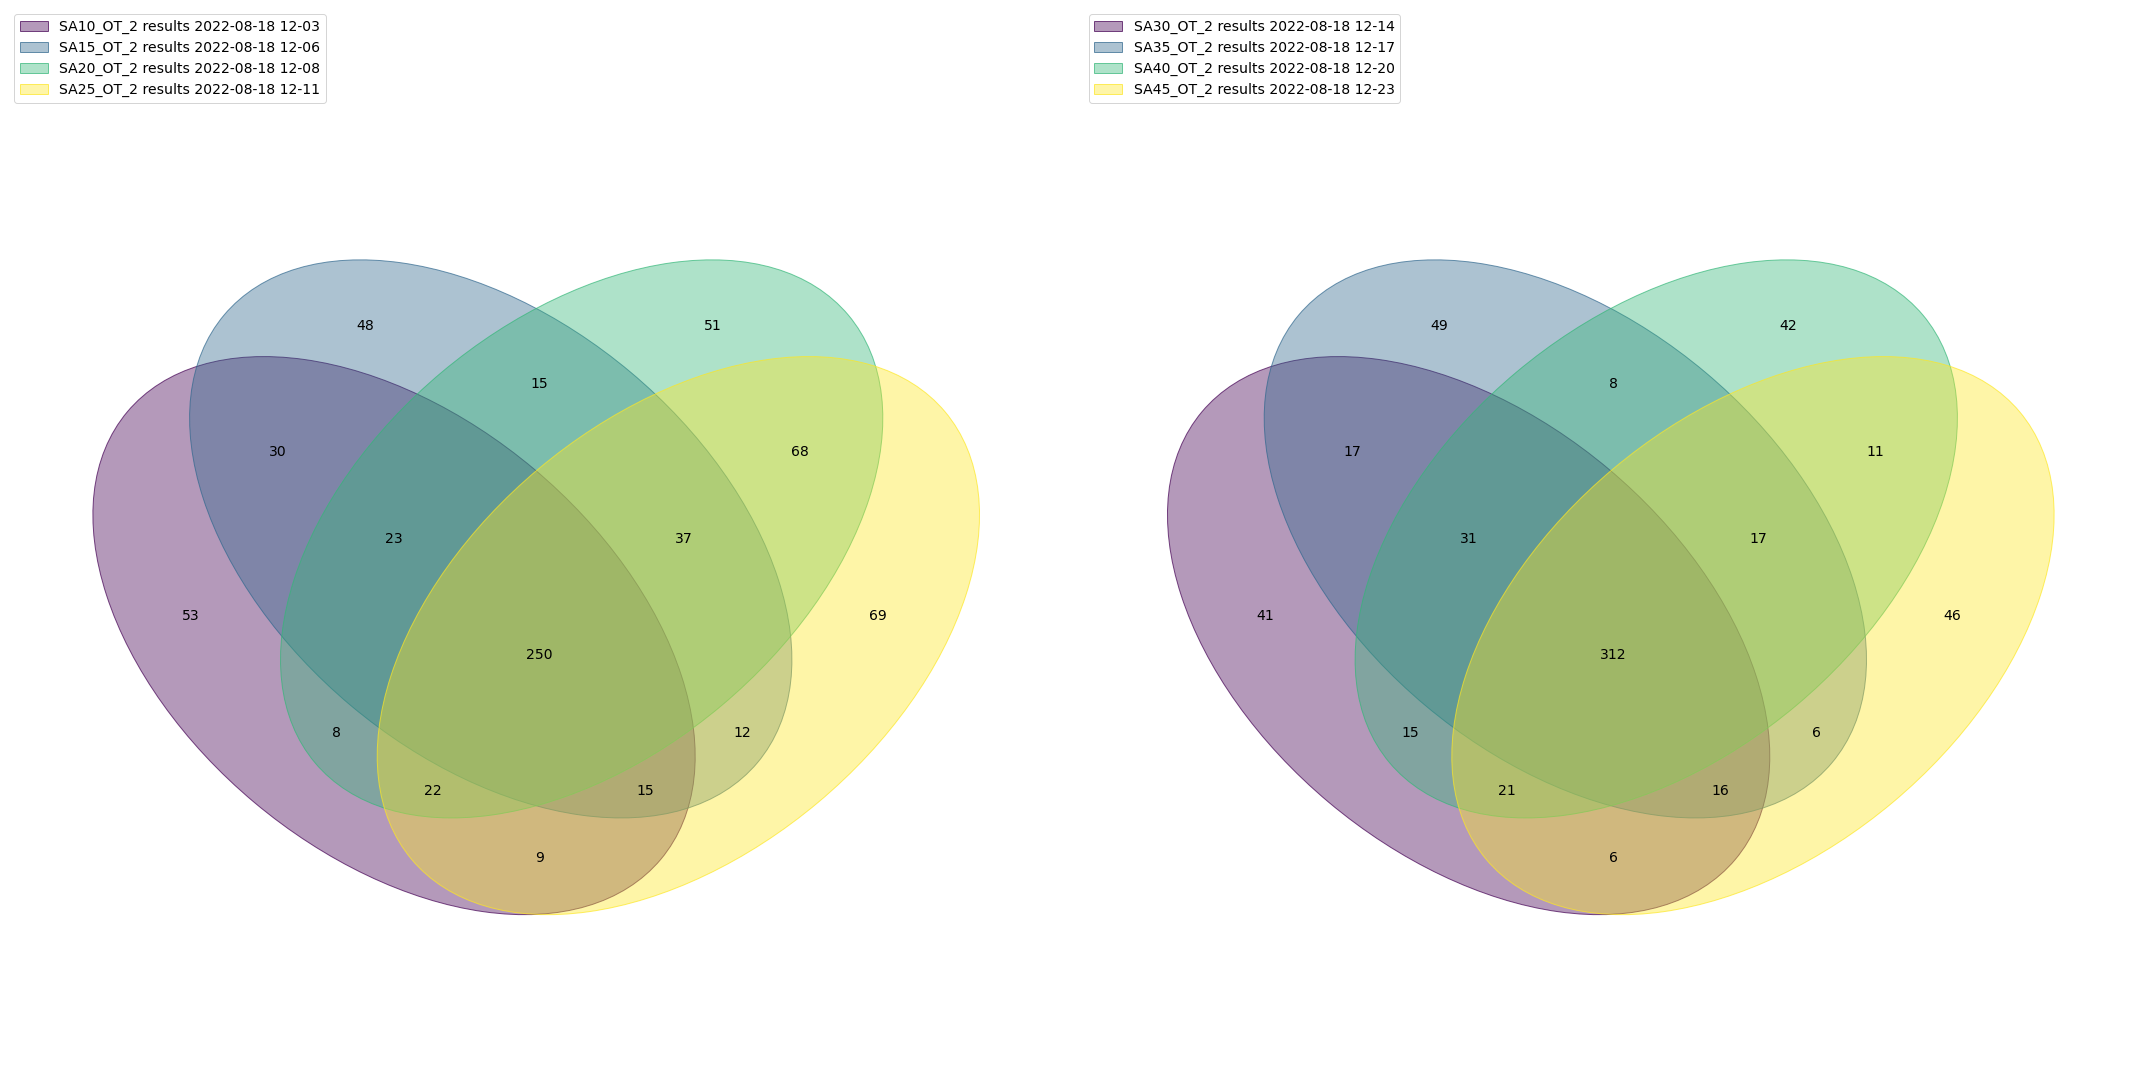

In [145]:
for j in range(n_aliquots):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(30, 30))
    keys_aliq = subkeys[j]
    for i,ax in enumerate(axs.ravel()):
        sub_keys = keys_aliq[i*4:(i+1)*4]
        subset = {sub_key:data_formatted[sub_key] for sub_key in sub_keys}
        venn(subset, fontsize = 14, legend_loc = 'upper left', ax = ax)

    plt.tight_layout()
    plt.savefig(f'Venn Diagram Aliquot {j+1} by method.png',dpi=300)

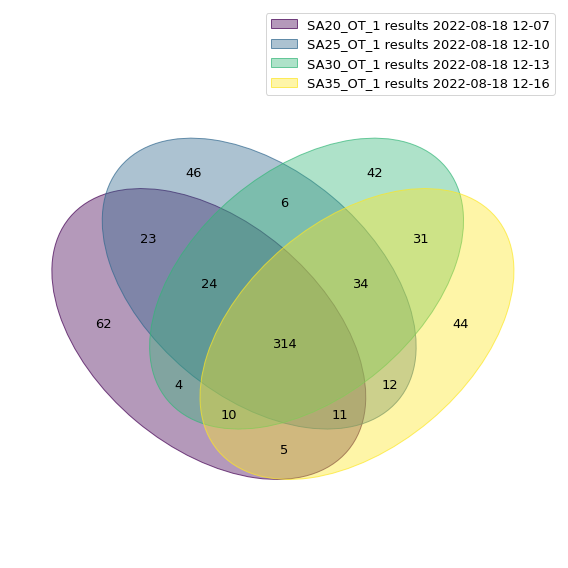

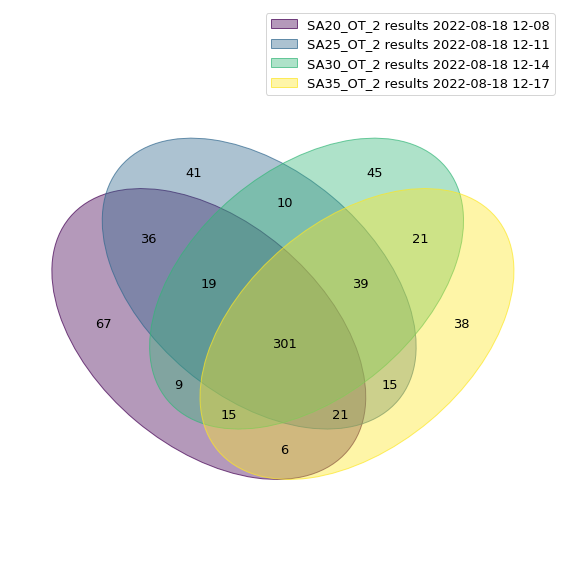

In [150]:
for j in range(n_aliquots):
    keys_best = bests[j]
    venn({s:data_formatted[s] for s in keys_best})
    plt.tight_layout()
    plt.savefig(f'Venn Diagram Best Methods Aliquot {j+1}.png', dpi=300)